In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_mldata('MNIST original')
x, y = mnist["data"], mnist["target"]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
x = x/255 # en büyük sayıya böldü ve 0 ve 1 aralığına çekti

In [5]:
y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [6]:
m = 60000
m_test = x.shape[0] - m

x_train, x_test = x[:m].T, x[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [7]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
x_train, y_train = x_train[:,shuffle_index], y_train[:,shuffle_index]

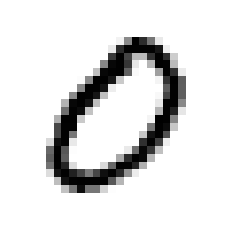

[1.]


In [8]:
i = 3
plt.imshow(x_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [9]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [10]:
def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )
    return L

In [11]:
learning_rate = 1

X = x_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(20):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 5 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.684080159543643
Epoch 5 cost:  0.08757930263345266
Epoch 10 cost:  0.07419867759416375
Epoch 15 cost:  0.0669089996545857
Final cost: 0.0628657932164047


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, x_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

# ikilik classta 2x2 matris geldi 10'luk classta 10x10 'luk bir matris gelecek.

[[8962   85]
 [  58  895]]


In [13]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      9047
        True       0.91      0.94      0.93       953

    accuracy                           0.99     10000
   macro avg       0.95      0.96      0.96     10000
weighted avg       0.99      0.99      0.99     10000



In [14]:

#forward , bacward,update
X = x_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h)
b2 = np.zeros((1, 1))

for i in range(20):

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = compute_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 5 == 0:
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.9144384083567224
Epoch 5 cost:  0.3949167379322358
Epoch 10 cost:  0.286952739910546
Epoch 15 cost:  0.23169867006054337
Final cost: 0.20414573401347053
